# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    city_url = url + "&q=" + city
    
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(city_url).json()

       
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

       
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    
    except:
        print("City not found. Skipping...")
        pass
              
 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | finschhafen
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | san blas
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | la ronge
Processing Record 15 of Set 1 | usinsk
Processing Record 16 of Set 1 | sakaraha
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | vicuna
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | chokurdakh
Proces

Processing Record 36 of Set 4 | carlyle
Processing Record 37 of Set 4 | afikpo
Processing Record 38 of Set 4 | chernyshevskiy
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | mandalgovi
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | manggar
Processing Record 43 of Set 4 | nichinan
Processing Record 44 of Set 4 | meadow lake
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | neosho
Processing Record 48 of Set 4 | jeremoabo
Processing Record 49 of Set 4 | scarborough
Processing Record 0 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | svetlaya
Processing Record 3 of Set 5 | eyl
Processing Record 4 of Set 5 | grand-santi
Processing Record 5 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | ust-m

Processing Record 22 of Set 8 | khandyga
Processing Record 23 of Set 8 | kabare
Processing Record 24 of Set 8 | kargasok
Processing Record 25 of Set 8 | stettler
Processing Record 26 of Set 8 | porto santo
Processing Record 27 of Set 8 | huilong
Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | buzdyak
Processing Record 30 of Set 8 | klaeng
Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 8 | coruripe
Processing Record 35 of Set 8 | sisimiut
Processing Record 36 of Set 8 | maralal
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | port hardy
Processing Record 39 of Set 8 | rybachiy
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | magadan
Processing Record 42 of Set 8 | boende
Processing Record 43 of Set 8 | altay
Processing Record 44 of Set 8 | kailua
Processing Record 45

Processing Record 10 of Set 12 | kenai
Processing Record 11 of Set 12 | verkhnyaya khava
Processing Record 12 of Set 12 | kracheh
City not found. Skipping...
Processing Record 13 of Set 12 | alofi
Processing Record 14 of Set 12 | denton
Processing Record 15 of Set 12 | cururupu
Processing Record 16 of Set 12 | los alamos
Processing Record 17 of Set 12 | meulaboh
Processing Record 18 of Set 12 | chickasha
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | cantaura
Processing Record 21 of Set 12 | slave lake
Processing Record 22 of Set 12 | tupik
Processing Record 23 of Set 12 | maghama
City not found. Skipping...
Processing Record 24 of Set 12 | uromi
Processing Record 25 of Set 12 | iskateley
Processing Record 26 of Set 12 | kloulklubed
Processing Record 27 of Set 12 | tessalit
Processing Record 28 of Set 12 | kourou
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | menongue
Processing Record 31 of Set 12 | bardsir
Processing Record 32 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df=pd.DataFrame(city_data)
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,64.40,94,0,13.80,ZA,1619134097
1,rikitea,-23.1203,-134.9692,78.13,75,87,14.36,PF,1619134316
2,puerto ayora,-0.7393,-90.3518,82.40,74,20,19.57,EC,1619134316
3,finschhafen,-6.6024,147.8681,84.97,69,75,7.76,PG,1619134317
4,yellowknife,62.4560,-114.3525,16.00,53,90,17.27,CA,1619134317


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,20.078700,17.221419,60.074203,69.534709,56.615385,8.415235,1.619134e+09
std,33.249983,91.425394,19.739369,22.355997,37.388535,5.927069,7.940276e+01
min,-54.800000,-175.200000,0.910000,6.000000,0.000000,0.200000,1.619134e+09
25%,-6.176100,-66.382100,44.600000,59.000000,20.000000,4.000000,1.619134e+09
50%,24.687700,23.716200,63.000000,76.000000,73.000000,7.000000,1.619134e+09
75%,48.005600,97.200000,77.000000,86.000000,90.000000,11.500000,1.619134e+09
max,78.218600,179.316700,91.470000,100.000000,100.000000,41.470000,1.619134e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = city_data_df[(city_data_df["Humidity"] > 100)].index
                                  
humid_cities

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
non_humid_cities = city_data_df.drop(humid_cities)
non_humid_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,64.40,94,0,13.80,ZA,1619134097
1,rikitea,-23.1203,-134.9692,78.13,75,87,14.36,PF,1619134316
2,puerto ayora,-0.7393,-90.3518,82.40,74,20,19.57,EC,1619134316
3,finschhafen,-6.6024,147.8681,84.97,69,75,7.76,PG,1619134317
4,yellowknife,62.4560,-114.3525,16.00,53,90,17.27,CA,1619134317


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

ValueError: x and y must be the same size

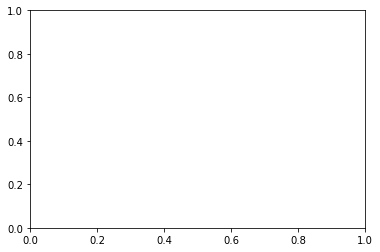

In [18]:
max_temp = non_humid_cities["Max Temp"]
plt.scatter(lats, max_temp, edgecolor="black",color ="blue", marker="o", linewidths=1, label="Cities")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)



plt.show()

## Latitude vs. Humidity Plot

ValueError: x and y must be the same size

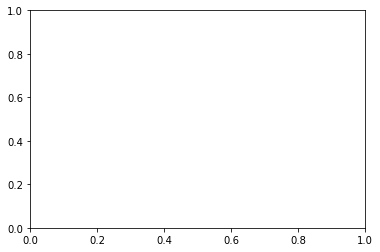

In [19]:
humidity = non_humid_cities["Humidity"]
plt.scatter(lats, humidity, edgecolor="black", facecolor="blue", marker="o", label="Cities")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

ValueError: x and y must be the same size

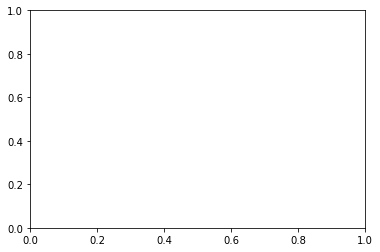

In [20]:
cloudiness = non_humid_cities["Cloudiness"]
plt.scatter(lats, cloudiness, edgecolor="black", facecolor="blue", marker="o", label="Cities")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

ValueError: x and y must be the same size

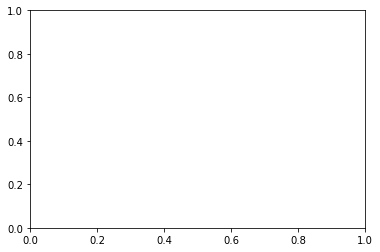

In [21]:
wind_speed = non_humid_cities["Wind Speed"]
plt.scatter(lats, wind_speed, edgecolor="black", facecolor="blue", marker="o", label="Cities")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show()

## Linear Regression

In [22]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7913695676715959


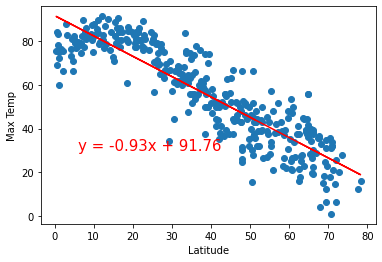

In [25]:
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49774387735743825


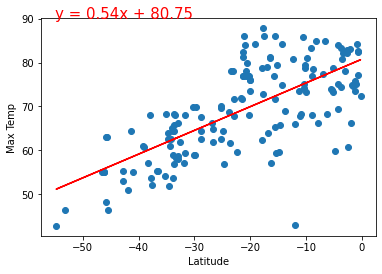

In [26]:

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010539688969685126


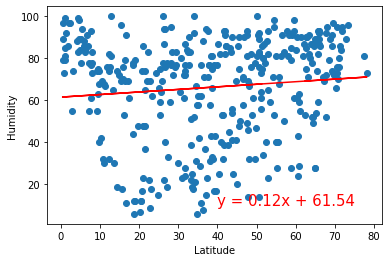

In [27]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011534743546939123


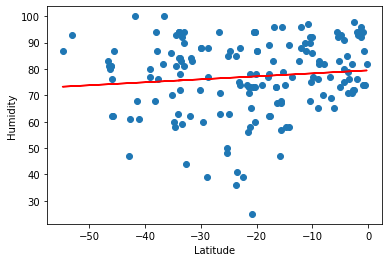

In [28]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.018925442671391207


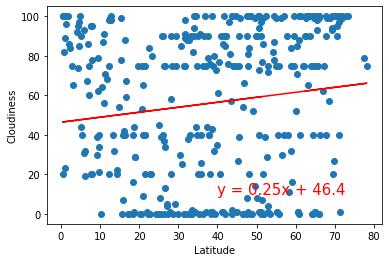

In [29]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003775696292895704


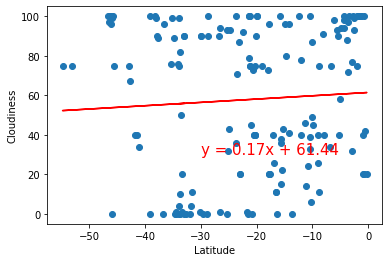

In [30]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018444600098585357


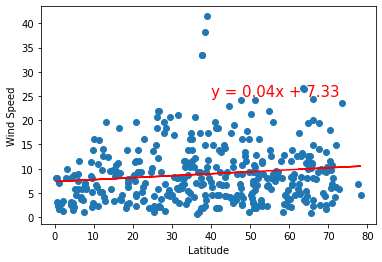

In [31]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0062427166046408545


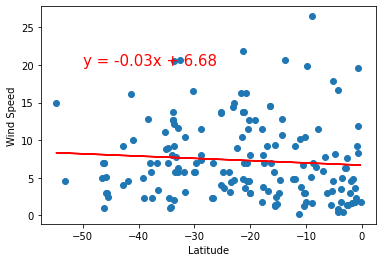

In [32]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))